# Assignment 1

* Student Name: Anisha Shrestha
* Student ID: 29389356
* Tutorial Code:01-p1
* Tutor: Heshan and Vijaya

# Task 1:
Data cleansing.
Please use the following cells to read the two data files, clean and integrate them. You can add/delete cells as many as required to the following cells.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [190]:
covid_d = pd.read_csv('covid-data.csv')
covid_d.head()
covid_d.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1570,United States,2020-07-10,3118008.0,63004.0,133291.0,982.0,54225.446,331002647.0
1571,United States,2020-07-11,3184633.0,66625.0,134097.0,806.0,54225.446,331002647.0
1572,United States,2020-07-12,3247684.0,63051.0,134814.0,717.0,54225.446,331002647.0
1573,United States,2020-13-07,3304942.0,57258.0,135205.0,391.0,54225.446,331002647.0
1574,United States,2020-14-07,3363056.0,58114.0,135605.0,400.0,54225.446,331002647.0


In [191]:
covid_d.shape

(1575, 8)

We observe that there are 1575 rows and 8 columns in the dataset. 

In [192]:
covid_d.describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,1.575000e+03,1575.000000,1569.000000,1568.000000,1575.000000,1.575000e+03
mean,1.804519e+05,2971.144762,14060.165073,183.845026,35140.156507,2.651630e+08
std,4.459794e+05,8201.673326,24813.077911,410.939288,11944.066886,4.532620e+08
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,15308.712000,2.549988e+07
25%,2.150000e+01,1.000000,0.000000,0.000000,26677.490000,6.046183e+07
50%,5.822600e+04,205.000000,2837.000000,5.000000,38605.671000,6.788600e+07
75%,1.731330e+05,1880.000000,25100.000000,149.000000,42200.977000,2.074978e+08
max,3.363056e+06,66625.000000,135605.000000,4928.000000,54225.446000,1.439324e+09


While visualising the data we can see that there are some data anomalies. for instance the min value of new_cases and new_deaths have a negative value. 
Also the total count for total_deaths and new_deaths are lower than the number of columns presented suggesting there are null values in those columns. 


In [194]:
covid_d.dtypes

location           object
date               object
total_cases       float64
new_cases         float64
total_deaths      float64
new_deaths        float64
gdp_per_capita    float64
population        float64
dtype: object

The datatypes of the columns are incorrect as well therefore will need to change.The total cases , new cases , total death and population should be integer and date should be in date datatype.

In [195]:
covid_d['location'].unique()

array(['Australia', 'Australia  ', 'China', ' China', 'France', 'Iran',
       'iran', 'Italy', 'Itly', 'Spain', 'United Kingdom',
       'UnitedKingdom', 'United States', 'United Stats'], dtype=object)

We see that there are some computational errors where there are extra spaces in the data and spelling errors. 

In [196]:
covid_d.location.value_counts()

France            197
Spain             196
Australia         190
China             189
Italy             185
Iran              185
United States     182
United Kingdom    179
UnitedKingdom      18
United Stats       15
Itly               12
iran               12
 China              8
Australia           7
Name: location, dtype: int64

Therefore, the below code is for cleaning up column locations by fixing naming conventions, spacings and capitalizations to the.

In [197]:
#cleaning up column locations by fixing naming conventions, spacings and capitalizations to the . 
covid_d.loc[covid_d['location'] =="Australia  ","location"]= "Australia"
covid_d.loc[covid_d['location'] ==" China","location"]= "China"
covid_d.loc[covid_d['location'] =="iran","location"]= "Iran"
covid_d.loc[covid_d['location'] =="Itly","location"]= "Italy"
covid_d.loc[covid_d['location'] =="UnitedKingdom","location"]= "United Kingdom"
covid_d.loc[covid_d['location'] =="United Stats","location"]= "United States"

covid_d.location.value_counts()

China             197
Italy             197
United States     197
Iran              197
United Kingdom    197
France            197
Australia         197
Spain             196
Name: location, dtype: int64

In [321]:
 #covid_d.date.unique()

Visualizing the date, I noticed the date conventions varries in the rows. The following code creates a constant date format. After that I change the date into the date format

In [199]:
# changing all date format to yyyy-mm-dd
for idx, row in covid_d.iterrows():#investigate about df.iterrows() 
    tmp=row[1].split('-')
    if int(tmp[1])>12:
        covid_d.count
        covid_d.loc[idx,'date']=tmp[0]+'-'+tmp[2]+'-'+tmp[1]

In [200]:
covid_d.date.unique()
covid_d.date= pd.to_datetime(covid_d.date) 
covid_d.dtypes

location                  object
date              datetime64[ns]
total_cases              float64
new_cases                float64
total_deaths             float64
new_deaths               float64
gdp_per_capita           float64
population               float64
dtype: object

The following code is used to check if there are rows in the dataset with null/missing values.The isnull() function returns a boolean value (0=false and 1=true) and the sum function adds all the boolean values. This way we come to know that total_death and new_deaths column has 6  and 7 rows of NaN values respectively. https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers

In [201]:
#Checking for null/ missing values
covid_d.isnull().sum()

location          0
date              0
total_cases       0
new_cases         0
total_deaths      6
new_deaths        7
gdp_per_capita    0
population        0
dtype: int64

The followig code allows us to visualize the rows that have a null value in total_deaths column. The isnull() returns true and false, while covid_d[bool_null] displays rows from the dataframe that returned true from the isnull() statement. 

In [202]:
# visualizing the null values in total_deaths 
bool_null = pd.isnull(covid_d["total_deaths"])  
#filtering data with nan values

covid_d[bool_null]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
250,China,2020-02-22,76369.0,826.0,NaN,109.0,15308.712,1.439324e+09
650,Iran,2020-02-28,245.0,106.0,NaN,7.0,19082.620,8.399295e+07
680,Iran,2020-03-29,35408.0,3076.0,NaN,139.0,19082.620,8.399295e+07
850,Italy,2020-03-02,1689.0,561.0,NaN,6.0,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,NaN,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,NaN,NaN,54225.446,3.310026e+08


In [203]:
covid_d.loc[{251,651,681,851,1201,1501}]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
681,Iran,2020-03-30,38309.0,2901.0,2640.0,123.0,19082.620,8.399295e+07
651,Iran,2020-02-29,388.0,143.0,34.0,8.0,19082.620,8.399295e+07
1201,United Kingdom,2020-01-20,0.0,0.0,0.0,0.0,39753.244,6.788600e+07
851,Italy,2020-03-03,2036.0,347.0,52.0,17.0,35220.084,6.046183e+07
251,China,2020-02-23,77016.0,647.0,2445.0,98.0,15308.712,1.439324e+09
1501,United States,2020-05-02,1103781.0,33955.0,65068.0,2062.0,54225.446,3.310026e+08


Since the total no. of deaths for a particular day is equivalent to total no. of deaths from the next day minus to the new no of deaths as it is a derived value, the following for loop will replace NaNs the correct total_deaths values. 


In [204]:
for idx, row in covid_d[bool_null].iterrows():#investigate about df.iterrows() 
    tdeath_val= covid_d.loc[idx+1].total_deaths - covid_d.loc[idx+1].new_deaths
    covid_d.loc[idx,"total_deaths"]=tdeath_val 
        

In [205]:
 covid_d[bool_null]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
250,China,2020-02-22,76369.0,826.0,2347.0,109.0,15308.712,1.439324e+09
650,Iran,2020-02-28,245.0,106.0,26.0,7.0,19082.620,8.399295e+07
680,Iran,2020-03-29,35408.0,3076.0,2517.0,139.0,19082.620,8.399295e+07
850,Italy,2020-03-02,1689.0,561.0,35.0,6.0,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,0.0,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,63006.0,NaN,54225.446,3.310026e+08


 Now, visualizing the null/missing values for new_deaths column
 

In [206]:
# visualizing the null values in total_deaths 
bool_null = pd.isnull(covid_d["new_deaths"])  
#filtering data with nan values 
covid_d[bool_null]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
100,Australia,2020-04-09,6052.0,96.0,50.0,NaN,44648.710,2.549988e+07
300,China,2020-04-12,83097.0,93.0,3343.0,NaN,15308.712,1.439324e+09
500,France,2020-04-15,103573.0,5497.0,15729.0,NaN,38605.671,6.527351e+07
700,Iran,2020-04-18,79494.0,1499.0,4958.0,NaN,19082.620,8.399295e+07
900,Italy,2020-04-21,181228.0,2256.0,24114.0,NaN,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,0.0,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,63006.0,NaN,54225.446,3.310026e+08


In [207]:
covid_d.loc[{99,299,499,699,899,1199,1499}]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
99,Australia,2020-04-08,5956.0,112.0,45.0,3.0,44648.710,2.549988e+07
899,Italy,2020-04-20,178972.0,3047.0,23660.0,433.0,35220.084,6.046183e+07
299,China,2020-04-11,83004.0,79.0,3343.0,3.0,15308.712,1.439324e+09
1199,United Kingdom,2020-01-18,0.0,0.0,0.0,0.0,39753.244,6.788600e+07
499,France,2020-04-14,98076.0,2673.0,14967.0,574.0,38605.671,6.527351e+07
1499,United States,2020-04-30,1039909.0,27326.0,60966.0,2611.0,54225.446,3.310026e+08
699,Iran,2020-04-17,77995.0,1606.0,4869.0,92.0,19082.620,8.399295e+07


After visualizing the rows having an index lower than the null values index to check it the location is same. Since new_deaths of a particular day is equivalent to total_deaths minus the total_deaths from the previous day, the following for loop will replace NaNs with the correct new_deaths values. 

In [208]:
for idx, row in covid_d[bool_null].iterrows(): 
    ndeath_val= covid_d.loc[idx].total_deaths - covid_d.loc[idx-1].total_deaths
    covid_d.loc[idx,"new_deaths"]=ndeath_val 

In [209]:
covid_d.loc[bool_null] 

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
100,Australia,2020-04-09,6052.0,96.0,50.0,5.0,44648.710,2.549988e+07
300,China,2020-04-12,83097.0,93.0,3343.0,0.0,15308.712,1.439324e+09
500,France,2020-04-15,103573.0,5497.0,15729.0,762.0,38605.671,6.527351e+07
700,Iran,2020-04-18,79494.0,1499.0,4958.0,89.0,19082.620,8.399295e+07
900,Italy,2020-04-21,181228.0,2256.0,24114.0,454.0,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,0.0,0.0,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,63006.0,2040.0,54225.446,3.310026e+08


The following code changes the data type of total_cases, new_cases, total_deaths and population to integer. The variable col_names stores the column names of the dataset which needs to be converted to integer and the for loop loops through the array and sets each column's datatype to integer.   

In [210]:
col_names = set(['total_cases','new_cases','total_deaths','new_deaths','population'])
for i in col_names:
    covid_d[i] = covid_d[i].astype('int')

In [211]:
covid_d.dtypes

location                  object
date              datetime64[ns]
total_cases                int32
new_cases                  int32
total_deaths               int32
new_deaths                 int32
gdp_per_capita           float64
population                 int32
dtype: object

The following codes check for faulty data in the dataframe. 

In [212]:
#checking if there are any total_cases with a negative value
covid_d[covid_d['total_cases']< 0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [213]:
#checking if there are any new_cases with a negative value
neg_val= covid_d[covid_d['new_cases']< 0]
neg_val

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
549,France,2020-06-03,151325,-766,28940,107,38605.671,65273512
960,Italy,2020-06-20,238011,-148,34561,47,35220.084,60461828
1095,Spain,2020-04-19,193252,-713,20453,410,34272.360,46754783
1131,Spain,2020-05-25,235400,-372,26834,-1918,34272.360,46754783
1323,United Kingdom,2020-05-21,248293,-525,35704,363,39753.244,67886004
1366,United Kingdom,2020-07-03,283757,-29726,43995,89,39753.244,67886004


We can see that the above rows have faulty data in the new_cases row.

looking at subset with just datas regarding to France and then visualizing the data from 545 onwards.


In [214]:
france = covid_d[covid_d.location =='France']

france.loc[545:]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
545,France,2020-05-30,149668,597,28714,52,38605.671,65273512
546,France,2020-05-31,151496,1828,28771,57,38605.671,65273512
547,France,2020-06-01,151753,257,28802,31,38605.671,65273512
548,France,2020-06-02,152091,338,28833,31,38605.671,65273512
549,France,2020-06-03,151325,-766,28940,107,38605.671,65273512
550,France,2020-06-04,151677,352,29021,81,38605.671,65273512
551,France,2020-06-05,152444,767,29065,44,38605.671,65273512
552,France,2020-06-06,153055,611,29111,46,38605.671,65273512
553,France,2020-06-07,153634,579,29142,31,38605.671,65273512
554,France,2020-06-08,153977,343,29155,13,38605.671,65273512


In [215]:
france.describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.0
mean,74838.096447,875.010152,13320.862944,152.431472,3.860567e+04,65273512.0
std,70250.052923,1335.583573,13331.169933,290.894927,6.565046e-11,0.0
min,0.000000,-766.000000,0.000000,0.000000,3.860567e+04,65273512.0
25%,12.000000,0.000000,1.000000,0.000000,3.860567e+04,65273512.0
50%,74390.000000,373.000000,8911.000000,25.000000,3.860567e+04,65273512.0
75%,145279.000000,1097.000000,28432.000000,166.000000,3.860567e+04,65273512.0
max,172377.000000,7578.000000,30029.000000,2004.000000,3.860567e+04,65273512.0


While viewing the dataset we can see that due to index 549 (i.e. new_cases with value -799) the values for total_cases after it is affected. Since the value is unknow to us we can subsitute it by taking the median of new_cases for France. This method can be applied for other negative values as well. 
I have chosen to take the median value because mean is affected by the negative value and medium just uses the central value.
Once the value is updated we can then recalculate the values of total_cases for data from index 549 to 590.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html


In [216]:
new_cases_avg= france.new_cases.median()
covid_d.loc[549,'new_cases'] = new_cases_avg
# covid_d.dtypes
covid_d.new_cases = covid_d.new_cases.astype('int')

covid_d.loc[549,'new_cases']

373

In [217]:
#creating a subset from  549 to 590 to recalculate total_values 
sub_france = france[549:]
# sub_france
for i,row in sub_france.iterrows():
    covid_d.loc[i,'total_cases']= covid_d.loc[i-1].total_cases+ covid_d.loc[i].new_cases


In [218]:
#covid_d.loc[549:590]

#### Now, creating a subset to visualize the data's in Italy 

In [219]:
italy = covid_d[covid_d.location=="Italy"]
# italy

In [220]:
italy.describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.0
mean,118362.847716,1234.670051,16329.319797,177.497462,3.522008e+04,60461828.0
std,104756.426820,1704.833261,15079.513240,243.121256,1.313009e-10,0.0
min,0.000000,-148.000000,0.000000,-31.000000,3.522008e+04,60461828.0
25%,3.000000,0.000000,0.000000,0.000000,3.522008e+04,60461828.0
50%,132547.000000,321.000000,16525.000000,50.000000,3.522008e+04,60461828.0
75%,230158.000000,1965.000000,32877.000000,269.000000,3.522008e+04,60461828.0
max,243230.000000,6557.000000,34967.000000,971.000000,3.522008e+04,60461828.0


Simialr to the France subset we can see that the value of new_cases(i.e -148) in index 960 has affected the total_cases from index 961. Therefore we will apply the same method again. Since the dataset has high standard deviation we will be using the median to replace the faulty data for better representation of the data. 

In [221]:
covid_d.loc[960,'new_cases'] = italy.new_cases.median()
# covid_d.dtypes

#rounds off the mean value when changing the column data type to int
covid_d.new_cases = covid_d.new_cases.astype('int')

covid_d.loc[960,'new_cases']

321

In [222]:
sub_italy = covid_d[960:985]
sub_italy
for i,row in sub_italy.iterrows():
    covid_d.loc[i,'total_cases']= covid_d.loc[i-1].total_cases+ covid_d.loc[i].new_cases


In [223]:
 covid_d.loc[960:984]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
960,Italy,2020-06-20,238480,321,34561,47,35220.084,60461828
961,Italy,2020-06-21,238744,264,34610,49,35220.084,60461828
962,Italy,2020-06-22,238968,224,34634,24,35220.084,60461828
963,Italy,2020-06-23,239189,221,34657,23,35220.084,60461828
964,Italy,2020-06-24,239302,113,34675,18,35220.084,60461828
965,Italy,2020-06-25,239879,577,34644,-31,35220.084,60461828
966,Italy,2020-06-26,240175,296,34678,34,35220.084,60461828
967,Italy,2020-06-27,240430,255,34708,30,35220.084,60461828
968,Italy,2020-06-28,240605,175,34716,8,35220.084,60461828
969,Italy,2020-06-29,240779,174,34738,22,35220.084,60461828


The describe() function above also displayed negative value for new_deaths min value which is also faulty since the value cant be less than 0. Therefore, we will now be visualising the data from the new deaths column.

In [224]:
# checking for values less than 0 for new death column 
italy[italy.new_deaths<0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
965,Italy,2020-06-25,239410,577,34644,-31,35220.084,60461828


In [225]:
italy.loc[963:970]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
963,Italy,2020-06-23,238720,221,34657,23,35220.084,60461828
964,Italy,2020-06-24,238833,113,34675,18,35220.084,60461828
965,Italy,2020-06-25,239410,577,34644,-31,35220.084,60461828
966,Italy,2020-06-26,239706,296,34678,34,35220.084,60461828
967,Italy,2020-06-27,239961,255,34708,30,35220.084,60461828
968,Italy,2020-06-28,240136,175,34716,8,35220.084,60461828
969,Italy,2020-06-29,240310,174,34738,22,35220.084,60461828
970,Italy,2020-06-30,240436,126,34744,6,35220.084,60461828


The above dataframe shows that the value of total death is less for index 965 than what it was for index 964. Therefore, we can see that the faulty data has affected the values of total_death from index 966 onwards as total_deaths is a derived value. here as well we will be inserting the median value in substitute to the faulty data as the SD of the data is high. 

In [226]:
covid_d.loc[965,'new_deaths']= italy.new_deaths.median()

covid_d.new_deaths = covid_d.new_deaths.astype('int')
covid_d.loc[965,'new_deaths']

50

In [227]:
# recalculating the value of total deaths in the italy subset 
italy_sub= italy.loc[965:]
#italy_sub

for i,row in italy_sub.iterrows():
    covid_d.loc[i,'total_deaths']= covid_d.loc[i-1].total_deaths + covid_d.loc[i].new_deaths

In [228]:
covid_d.loc[965:970]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
965,Italy,2020-06-25,239879,577,34725,50,35220.084,60461828
966,Italy,2020-06-26,240175,296,34759,34,35220.084,60461828
967,Italy,2020-06-27,240430,255,34789,30,35220.084,60461828
968,Italy,2020-06-28,240605,175,34797,8,35220.084,60461828
969,Italy,2020-06-29,240779,174,34819,22,35220.084,60461828
970,Italy,2020-06-30,240905,126,34825,6,35220.084,60461828


Now, creating a subset for Spain to visualize its faulty data. 

In [229]:
spain= covid_d[covid_d.location == "Spain"]
spain.loc[1100:1150]


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1100,Spain,2020-04-24,205763,2114,22524,367,34272.36,46754783
1101,Spain,2020-04-25,208269,2506,22902,378,34272.36,46754783
1102,Spain,2020-04-26,209910,1641,23190,288,34272.36,46754783
1103,Spain,2020-04-27,211570,1660,23190,0,34272.36,46754783
1104,Spain,2020-04-28,213095,1525,23822,632,34272.36,46754783
1105,Spain,2020-04-29,213942,847,24275,453,34272.36,46754783
1106,Spain,2020-04-30,215183,1241,24543,268,34272.36,46754783
1107,Spain,2020-05-01,216570,1387,24824,281,34272.36,46754783
1108,Spain,2020-05-02,217804,1234,25100,276,34272.36,46754783
1109,Spain,2020-05-03,218739,935,25264,164,34272.36,46754783


In [230]:
spain.describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,196.000000,196.000000,196.000000,196.000000,1.960000e+02,196.0
mean,121927.494898,1305.882653,13314.867347,144.928571,3.427236e+04,46754783.0
std,110118.434811,2142.028323,12716.734608,302.818461,9.482967e-11,0.0
min,0.000000,-713.000000,0.000000,-1918.000000,3.427236e+04,46754783.0
25%,2.000000,0.000000,0.000000,0.000000,3.427236e+04,46754783.0
50%,145002.500000,348.000000,12736.500000,2.000000,3.427236e+04,46754783.0
75%,235893.750000,1421.500000,27134.250000,192.000000,3.427236e+04,46754783.0
max,255953.000000,9181.000000,28752.000000,1179.000000,3.427236e+04,46754783.0


visualizing and substituting value for new_cases column

In [231]:
spain[spain.new_cases<0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1095,Spain,2020-04-19,193252,-713,20453,410,34272.36,46754783
1131,Spain,2020-05-25,235400,-372,26834,-1918,34272.36,46754783


In [232]:
# spain.loc[1090:1115]
# spain.loc[1130:]

In [233]:
#substituting faulty values with median 
covid_d.loc[1095,'new_cases']= spain.new_cases.median()
covid_d.loc[1131,'new_cases']= spain.new_cases.median()

covid_d.new_cases = covid_d.new_cases.astype('int')
covid_d.loc[1095,'new_cases']
covid_d.loc[1131,'new_cases']

348

In [234]:
spain_sub = spain.loc[1095:]
for i, row in spain_sub.iterrows():
    covid_d.loc[i,'total_cases']= covid_d.loc[i-1].total_cases + covid_d.loc[i].new_cases


In [235]:
covid_d.loc[1095:1111]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1095,Spain,2020-04-19,194313,348,20453,410,34272.36,46754783
1096,Spain,2020-04-20,196531,2218,20852,399,34272.36,46754783
1097,Spain,2020-04-21,199482,2951,21282,430,34272.36,46754783
1098,Spain,2020-04-22,201794,2312,21717,435,34272.36,46754783
1099,Spain,2020-04-23,204710,2916,22157,440,34272.36,46754783
1100,Spain,2020-04-24,206824,2114,22524,367,34272.36,46754783
1101,Spain,2020-04-25,209330,2506,22902,378,34272.36,46754783
1102,Spain,2020-04-26,210971,1641,23190,288,34272.36,46754783
1103,Spain,2020-04-27,212631,1660,23190,0,34272.36,46754783
1104,Spain,2020-04-28,214156,1525,23822,632,34272.36,46754783


Now checking new_deaths column to view data that are less than 0

In [236]:
spain[spain.new_deaths<0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1131,Spain,2020-05-25,235400,-372,26834,-1918,34272.36,46754783


In [237]:
covid_d.loc[1131,'new_deaths']= spain.new_deaths.median()
covid_d.new_deaths = covid_d.new_deaths.astype('int')
covid_d.loc[1131,'new_deaths']

2

In [238]:
#calculating total death 
spain_sub= spain.loc[1131:]
for i, row in spain_sub.iterrows():
    covid_d.loc[i,'total_deaths']=covid_d.loc[i-1].total_deaths + covid_d.loc[i].new_deaths

In [239]:
covid_d.loc[1131:1151]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1131,Spain,2020-05-25,237181,348,28754,2,34272.36,46754783
1132,Spain,2020-05-26,238040,859,29037,283,34272.36,46754783
1133,Spain,2020-05-27,238550,510,29038,1,34272.36,46754783
1134,Spain,2020-05-28,239687,1137,29039,1,34272.36,46754783
1135,Spain,2020-05-29,240345,658,29041,2,34272.36,46754783
1136,Spain,2020-05-30,241009,664,29045,4,34272.36,46754783
1137,Spain,2020-05-31,241210,201,29047,2,34272.36,46754783
1138,Spain,2020-06-01,241419,209,29047,0,34272.36,46754783
1139,Spain,2020-06-02,241713,294,29047,0,34272.36,46754783
1140,Spain,2020-06-03,242107,394,29048,1,34272.36,46754783


Now, creating a subset of united kingdom

In [240]:
uk = covid_d[covid_d.location =="United Kingdom"]
uk

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1181,United Kingdom,2019-12-31,0,0,0,0,39753.244,67886004
1182,United Kingdom,2020-01-01,0,0,0,0,39753.244,67886004
1183,United Kingdom,2020-01-02,0,0,0,0,39753.244,67886004
1184,United Kingdom,2020-01-03,0,0,0,0,39753.244,67886004
1185,United Kingdom,2020-01-04,0,0,0,0,39753.244,67886004
...,...,...,...,...,...,...,...,...
1373,United Kingdom,2020-07-10,287621,642,44602,85,39753.244,67886004
1374,United Kingdom,2020-07-11,288133,512,44650,48,39753.244,67886004
1375,United Kingdom,2020-07-12,288953,820,44798,148,39753.244,67886004
1376,United Kingdom,2020-07-13,289603,650,44819,21,39753.244,67886004


In [241]:
uk.describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.0
mean,117217.314721,1472.756345,16990.517766,227.563452,3.975324e+04,67886004.0
std,125967.591492,2951.236701,18287.553513,307.236883,4.376697e-11,0.0
min,0.000000,-29726.000000,0.000000,0.000000,3.975324e+04,67886004.0
25%,9.000000,0.000000,0.000000,0.000000,3.975324e+04,67886004.0
50%,51608.000000,820.000000,6433.000000,77.000000,3.975324e+04,67886004.0
75%,261184.000000,3009.000000,36914.000000,351.000000,3.975324e+04,67886004.0
max,313483.000000,8719.000000,44830.000000,1172.000000,3.975324e+04,67886004.0


In [242]:
uk[uk.new_cases<0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1323,United Kingdom,2020-05-21,248293,-525,35704,363,39753.244,67886004
1366,United Kingdom,2020-07-03,283757,-29726,43995,89,39753.244,67886004


In [243]:
uk.loc[1320:1325]
uk.loc[1360:1370]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1360,United Kingdom,2020-06-27,309360,1380,43414,184,39753.244,67886004
1361,United Kingdom,2020-06-28,310250,890,43514,100,39753.244,67886004
1362,United Kingdom,2020-06-29,311151,901,43550,36,39753.244,67886004
1363,United Kingdom,2020-06-30,311965,814,43575,25,39753.244,67886004
1364,United Kingdom,2020-07-01,312654,689,43730,155,39753.244,67886004
1365,United Kingdom,2020-07-02,313483,829,43906,176,39753.244,67886004
1366,United Kingdom,2020-07-03,283757,-29726,43995,89,39753.244,67886004
1367,United Kingdom,2020-07-04,284276,519,44131,136,39753.244,67886004
1368,United Kingdom,2020-07-05,284900,624,44198,67,39753.244,67886004
1369,United Kingdom,2020-07-06,285416,516,44220,22,39753.244,67886004


In [244]:
#substitution the faulty new_cases value with the median 
covid_d.loc[1323,'new_cases'] = uk.new_cases.median()
covid_d.loc[1366,'new_cases'] = uk.new_cases.median()
# covid_d.loc[1360:1370]
covid_d.new_cases = covid_d.new_cases.astype('int')

#covid_d.loc[1323,'new_cases']
covid_d.loc[1366,'new_cases']

820

In [245]:
#recalculating total_cases 
uk_sub = uk.loc[1323:]
for i, row in uk_sub.iterrows():
    covid_d.loc[i,'total_cases']= covid_d.loc[i-1].total_cases + covid_d.loc[i].new_cases

In [246]:
covid_d.loc[1320:1325]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1320,United Kingdom,2020-05-18,243695,3534,34636,170,39753.244,67886004
1321,United Kingdom,2020-05-19,246406,2711,34796,160,39753.244,67886004
1322,United Kingdom,2020-05-20,248818,2412,35341,545,39753.244,67886004
1323,United Kingdom,2020-05-21,249638,820,35704,363,39753.244,67886004
1324,United Kingdom,2020-05-22,252253,2615,36042,338,39753.244,67886004
1325,United Kingdom,2020-05-23,255540,3287,36393,351,39753.244,67886004


Now, checking various other types of faulty data that might occur. 

In [250]:
#checking if there are rows where new_cases are > total cases 
covid_d.loc[(covid_d.new_cases) > (covid_d.total_cases)]


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [251]:
#checking if there are rows where new_deaths are > total deaths  
covid_d.loc[(covid_d.new_deaths) > (covid_d.total_deaths)]


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [252]:
covid_d.loc[(covid_d.total_cases + covid_d.total_deaths) > (covid_d.population)]


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [253]:
covid_d.loc[(covid_d.total_cases) < (covid_d.total_deaths)]


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [254]:
covid_d.loc[covid_d.gdp_per_capita<0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [255]:
ldf= pd.read_csv('CountryLockdowndates.csv')
ldf.head(5)


,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [256]:
ldf.shape

(307, 5)

In [257]:
ldf.describe()

,Country/Region,Province,Date,Type,Reference
count,307,129,230,307,238
unique,182,129,37,3,146
top,US,Maine,23/01/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
freq,54,1,31,207,40


In [258]:
ldf.dtypes

Country/Region    object
Province          object
Date              object
Type              object
Reference         object
dtype: object

In [259]:
ldf['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Cote dIvoire', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

In [260]:
# Renaming US to United States 
for i , row in ldf.iterrows():
    if row[0]=='US':
        ldf.loc[i,'Country/Region']='United States'

In [261]:
ldf_sub = ldf[(ldf['Country/Region']=='Australia') |(ldf['Country/Region']=='China') |(ldf['Country/Region']=='France')|
             (ldf['Country/Region']=='Iran')|(ldf['Country/Region']=='Italy')|(ldf['Country/Region']=='Spain') | (ldf['Country/Region']=='United Kingdom')
             | (ldf['Country/Region']=='United States')]
lockdown = pd.DataFrame(ldf_sub)
lockdown

,Country/Region,Province,Date,Type,Reference
8,Australia,Australian Capital Territory,NaN,None,https://en.wikipedia.org/wiki/2020_coronavirus...
9,Australia,New South Wales,NaN,None,https://en.wikipedia.org/wiki/2020_coronavirus...
10,Australia,Northern Territory,NaN,None,https://en.wikipedia.org/wiki/2020_coronavirus...
11,Australia,Queensland,NaN,None,https://en.wikipedia.org/wiki/2020_coronavirus...
12,Australia,South Australia,NaN,None,https://en.wikipedia.org/wiki/2020_coronavirus...
...,...,...,...,...,...
295,United States,Virginia,30/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
296,United States,Washington,23/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
297,United States,West Virginia,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
298,United States,Wisconsin,25/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [262]:
lockdown['Country/Region'].unique()

array(['Australia', 'China', 'France', 'Iran', 'Italy', 'Spain',
       'United Kingdom', 'United States'], dtype=object)

In [263]:
# removing NaN rows from where date is NaN as lockdowns didnt occur in those provices 
lockdown = lockdown[lockdown['Date'].notna()] 

# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
lockdown

,Country/Region,Province,Date,Type,Reference
14,Australia,Victoria,24/03/2020,Full,https://www.theage.com.au/national/victoria/sc...
53,China,Anhui,23/01/2020,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
54,China,Beijing,23/01/2020,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
55,China,Chongqing,23/01/2020,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
56,China,Fujian,23/01/2020,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
...,...,...,...,...,...
294,United States,Virgin Islands,25/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
295,United States,Virginia,30/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
296,United States,Washington,23/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
297,United States,West Virginia,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [264]:
#formating Date to Covid data frame date format
for i, row in lockdown.iterrows():
    tem = row[2].split('/')
    lockdown.loc[i,'Date']= tem[2]+'-'+tem[1]+'-'+tem[0]

D:\fit1043\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-264-ad5412f61a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lockdown.loc[i,'Date']= tem[2]+'-'+tem[1]+'-'+tem[0]


In [265]:
lockdown.head()

,Country/Region,Province,Date,Type,Reference
14,Australia,Victoria,2020-03-24,Full,https://www.theage.com.au/national/victoria/sc...
53,China,Anhui,2020-01-23,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
54,China,Beijing,2020-01-23,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
55,China,Chongqing,2020-01-23,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
56,China,Fujian,2020-01-23,Full,https://en.wikipedia.org/wiki/2020_Hubei_lockd...
...,...,...,...,...,...
294,United States,Virgin Islands,2020-03-25,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
295,United States,Virginia,2020-03-30,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
296,United States,Washington,2020-03-23,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
297,United States,West Virginia,2020-03-24,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [266]:
#lockdown
#changing date to date format
lockdown.Date = pd.to_datetime(lockdown.Date)

#min date for each country
lockdown_min =lockdown.groupby('Country/Region').agg({'Date':'min'})
#lockdown_min

# #flattening the groupby output
lockdown_min = lockdown_min.reset_index()                  # turn 'class' groups into column values

lockdown_min

D:\fit1043\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Country/Region,Date
0,Australia,2020-03-24
1,China,2020-01-23
2,France,2020-03-16
3,Iran,2020-03-15
4,Italy,2020-03-11
5,Spain,2020-03-14
6,United Kingdom,2020-03-18
7,United States,2020-03-13


In [267]:
# renaming columns 
lockdown_min.columns=['location','lockdown_date']# Rename columns
lockdown_min

,location,lockdown_date
0,Australia,2020-03-24
1,China,2020-01-23
2,France,2020-03-16
3,Iran,2020-03-15
4,Italy,2020-03-11
5,Spain,2020-03-14
6,United Kingdom,2020-03-18
7,United States,2020-03-13


In [272]:
# merging two datasets 
clean_data = pd.merge(covid_d, lockdown_min, on=['location'])
clean_data
clean_data[clean_data.location=="United Kingdom"].describe()

,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
count,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.0
mean,119453.492386,1634.639594,16990.517766,227.563452,3.975324e+04,67886004.0
std,129183.130786,1923.878623,18287.553513,307.236883,4.376697e-11,0.0
min,0.000000,0.000000,0.000000,0.000000,3.975324e+04,67886004.0
25%,9.000000,0.000000,0.000000,0.000000,3.975324e+04,67886004.0
50%,51608.000000,820.000000,6433.000000,77.000000,3.975324e+04,67886004.0
75%,262529.000000,3009.000000,36914.000000,351.000000,3.975324e+04,67886004.0
max,322024.000000,8719.000000,44830.000000,1172.000000,3.975324e+04,67886004.0




<h1 style="color:red;font-size:20px;">You need to export a data set which contains information of the cleaned cronavirus dataset as well as the lockdown date as the last step of task 1 in the following cell.</h1>  

Please use dataframename.to_csv('<student_ID>_Task1DataSet.csv', index=False) to export your cleansed and integrated dataset. If your student Id is 1234, you should export the file with the following code

In [277]:
 clean_data.to_csv('29389356_Task1DataSet.csv',index=False)


# Task 2: 

### Question 1.	
Create a line chart to show the trend of the daily number of new cases for each country and explore the result of visualisation (Create one line chart for each country). 

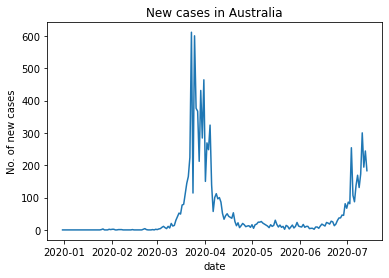

In [269]:
aus = clean_data[clean_data.location =='Australia']

plt.plot(aus.date,aus.new_cases)
plt.title('New cases in Australia')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

The graph shows an approximate constant line till the end of February with very low number of cases in Australia. During this time, the virus was pretty new therefore, the few cases can be presumed to be associated with travellers returning from Wuhan, China to Australia contracting the virus. In March the cases started skyrocketing, this can be attributed to the fact that the virus started spreading locally in Australia which was found through the wide spread testing being held. While the australian government did take actions on travelers and Australians coming back by making them self -isolate for 14 days the states functioned normally without any restrictions imposed on the general public. The drastic rise in the number of cases supports evidence of a long incubation period of the virus and people carrying the virus showing mild symptoms with no symptoms making it difficult to control its spreading. By the end of march, restrictions were applied in communities such as social distancing, limiting social gatherings and fining people who break the imposed rules. This way, contact between people were reduced and thus a gradual fall in the no. of cases can be observed in the graph from April to June. 
https://grattan.edu.au/news/australias-covid-19-response-the-story-so-far/

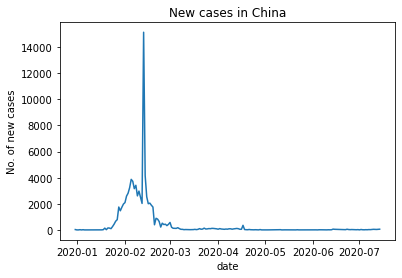

In [279]:
china= clean_data[clean_data.location =='China']

china_lc=plt.plot(china.date,china.new_cases)
plt.title('New cases in China')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

Till the end of the January the number of new cases were low with almost no change in its frequency. From Feburary onwards the number of cases slowly started rising, it might be because the virus started spreading locally in the community. The virus outbreak was first seen in early December 2019 however, officials were slow to respond to the outbreak. 

The number of cases skyrocked recording more than 14,000 cases in the middle of February as it's when Chinese people celebrate Lunar New Year. During this time most Chinese people travel around to celebrate with their families, this might have acted as a Catalyst to the spread of the virus. The number of cases plummeted as China imposed strict actions to contain the virus. China kept Wuhan and its neighbouring states into lockdown. Health personnels used “contact tracing to find potential cases”  (Hendrie,2020) .  People who showed mild symptoms were made to isolate in “makeshift isolation centers”  (Hendrie,2020) . China also managed to “construct two new hospitals and modify existing hospitals” (Hendrie,2020)  to accomodate to the covid-patients needs. Such drastic measures can be seen to be the reason why China doing maintain low number of cases from March onwards. 

https://www1.racgp.org.au/newsgp/clinical/what-can-australia-learn-from-the-global-coronavir

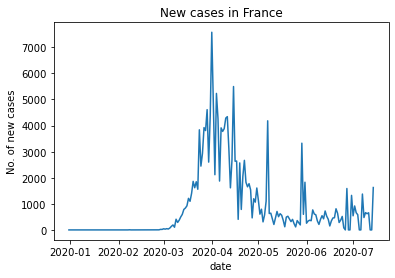

In [280]:
france= clean_data[clean_data.location =='France']

plt.plot(france.date,france.new_cases)
plt.title('New cases in France')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

The graph shows that France experienced an increasing number of coronavirus cases in the beginning of March. The slow increase might be the result of limiting social gatherings which helps slow the spread of the virus. The graph shows that close to the end of March France experienced an exponential increasein the number of new cases i.e. more than 7,000. During this time around France held its first round of 2020 municipal elections in March and urged the citizens to vote(Willsher,2020). Although the country had urged citizens to maintain social-distance while coming to vote, people gathering in masses might be the cause of the spike in daily numbers of cases. 

From April onwards, although the graph does show fluctuations in the number of cases from, the overall trend of the graph depicts that the daily number of new cases decreased this can be the result of increasing measures to limit human to human contact applied by the French government such as closing “public establishments”, “ban on gatherings of more than 10 people”, “closer of school and institutes for higher education”

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_France#Les_Contamines-Montjoie_cluster
https://www.theguardian.com/world/2020/mar/15/french-urged-to-vote-in-local-elections-amid-coronavirus-lockdown


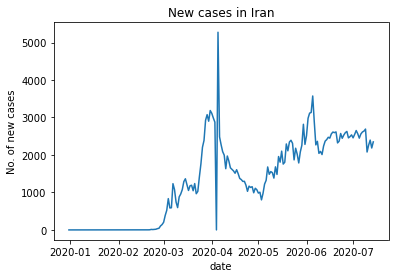

In [281]:
iran= clean_data[clean_data.location =='Iran']
plt.plot(iran.date,iran.new_cases)
plt.title('New cases in Iran')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

Iran experienced a gradual increase in the number of cases in late february. The exponential drop in the number of cases to 0 is most likely due to faulty data in the dataset, since the number of cases seems to exponentially increase to more than 5000 cases, the highest number of cases seen in Iran the very next day. Initially Iran downplayed the  seriousness of the virus,which resulted in the increasing number of cases due to transmissions within communities. 

As Iran imposed restrictions the cases started to decrease till the beginning of May after that the number of cases can be seen to be rising again. This is mainly due to Iran easing the restrictions fairly quickly. On 20th April Iran “shopping malls and bazaars” (Ali,2020) were opened and travel was resumed between different provinces. On 22nd April “parks and recreation area” (Ali,2020) were reopened. On 25th May Religious sites such as the mosques were reopened and on 26th May restaurants,cafes etc responded (Ali,2020). People also started to act carelessly as only “40% of the population” were following the social-distance rule.(Ali,2020). Iran also increased testing locals for covid in June, which might also be the reason for the resurge in new cases. 

https://www.bbc.com/news/52959756

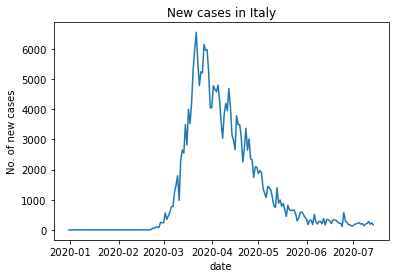

In [89]:
italy= clean_data[clean_data.location =='Italy']
plt.plot(italy.date,italy.new_cases)
plt.title('New cases in Italy')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()
italy_g

It can be seen in the graph that the number of cases steadily increased till it reached the highest number of daily cases around late March to more than 8,000 cases. According to the research on coronavirus, the virus poses a greater threat to the elderly and they are more likely to contract the virus (Belligoni, 2020) . Italy has the “sixth-longest life expectancy rate in the world” (Belligoni, 2020) , which deems that a lot of Italians are elderly, furthermore,” the average italian retirement age is expected to be 67”(Belligoni, 2020), therefore, older Italians may have been exposed to the virus during work. Another reason for the increasing number of cases might also be because the population of Italy is very dense, where cities such as Rome and Milan have 5,00 people and 19,000 people in every square mile respectively (Belligoni,2020). 

At the end of march the number of cases showing started to decline and from June onwards the number of cases appeared to be very low with only small fluctuations in the numbers. This should be because of the intensive efforts taken  by Italy starting from March 11 starting to show results to mitigate the spreading of the virus by banning “entry to arrivals from 13 countries” urging citizens to stay home etc.  
https://www.euronews.com/2020/07/10/covid-19-travel-italy-bans-entry-to-arrivals-from-13-at-risk-countries
https://theconversation.com/5-reasons-the-coronavirus-hit-italy-so-hard-134636


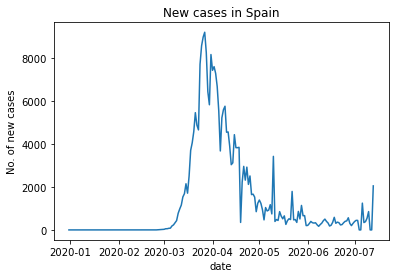

In [90]:
spain= clean_data[clean_data.location =='Spain']
plt.plot(spain.date,spain.new_cases)
plt.title('New cases in Spain')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show() 

The graph shows a constant line depicting cases close to 0 till the end of February. This might be because Spain is very far away from the origin of the virus. Therefore, there were close to 0 or 0 cases. From March onwards the number of cases progressively increased and reached its highest number i.e more than 8000 cases. On March 8th, the county hosted sport events, political party conferences and thousands marched against gender violence while celebrating international women's day (Tremlett,2020). All these events and mass gatherings therefore, these events might have accelerated the spread of the virus. 

By the end of March the number of cases gradually started to decrease and restrictions were imposed from March 14 onwards. There is a sudden spike in the number of cases to around 3000 in May. This might be because as the lockdown eased "new clusters" (Henley,2020) of people infected by the virus emerged.

https://www.theguardian.com/world/2020/mar/26/spain-coronavirus-response-analysis
https://www.theguardian.com/world/2020/may/28/covid-19-clusters-emerge-as-lockdowns-ease-across-europe

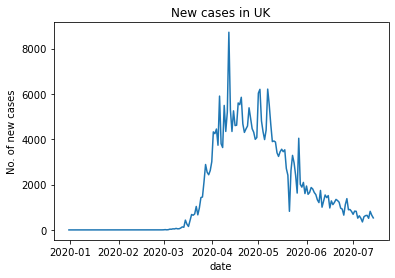

In [273]:
uk= clean_data[clean_data.location =='United Kingdom']
plt.plot(uk.date,uk.new_cases)
plt.title('New cases in UK')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

Similar to other European countries as the virus originated far away from Europe the number of cases in these months are close to zero. In March the number of causes gradually started to increase and reach its peak at more than 8,000 new cases in a day in early April. This gradual increase evidently occurred as the UK downplayed the severity of the virus and carried on with the Cheltenham Festival which went on from 10-13 March where about 250,000 people attended (Ashford,2020). These kinds of massive social events must have fueled the spreading of the virus within the community in the UK. Looking at the graph we can see that the UK did manage to bend the curve as cases started to decrease from mid April disregarding the fluctuations. This is primarily due to the UK urging the public not to make any unnecessary contact with one another and slowly imposing restrictions from 18th March onwards.

https://www.theweek.co.uk/coronavirus/106585/the-social-events-that-fuelled-the-covid-19-outbreak
https://www.theweek.co.uk/107044/UK-coronavirus-timeline

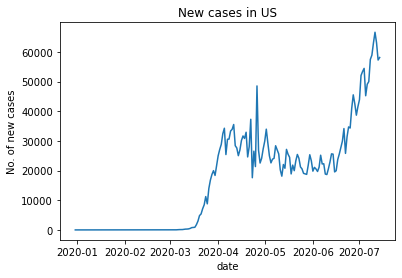

In [277]:
us= clean_data[clean_data.location =='United States']
plt.plot(us.date,us.new_cases)
plt.title('New cases in US')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.show()

The graph shows a low number of cases from January to the beginning of March as the origin of the virus was pretty far from the US and the cases present in the US were only of travelers entering the US. From mid March the cases gradually started to increase and by mid April the US had its first peak with more than 40,000 cases. This is essentially because the US lacked preparation in combating the virus, they gave false hope to the people saying it was under control. The Us failed to roll out the testing kits in time to test masses and isolate time causing the rise in the no. of new cases. On April 17, riots were held in the US demanding the restrictions to be lifted in some states to reopen businesses and allow large gatherings. Then on the Black Lives Matter movement took place in the US in various states which might have caused the cases to rise. 
https://texasscorecard.com/federal/new-data-suggests-coronavirus-lockdowns-didnt-work/

### Question 2
Add a vertical line for the lockdown date to the line chart of each country which you created in the previous question and explore if the lockdown affected the trend which is shown in the plot? Is the effect similar for all countries? Why do you think so?

https://stackoverflow.com/questions/19213789/how-do-you-plot-a-vertical-line-on-a-time-series-plot-in-pandas

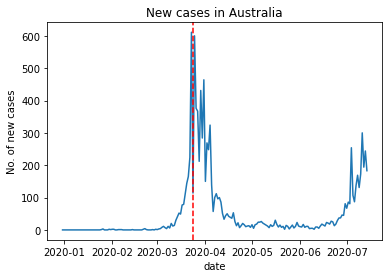

In [291]:
plt.plot(aus.date,aus.new_cases)
plt.title('New cases in Australia')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(lockdown_aus.lockdown_date, color="red", linestyle="--")
plt.show()

Yes, in Australia we can see that the lockdown did help reduce the number of new cases from emerging as the number of cases plemmited till the middle of 2020-06. The restrictions imposed restricted the public to only leave home for a few reasons such as for work, education, food and exercise and high penalties were introduced if anyone breaches the lockdown. The results from the graph show that the public were compliant with the restrictions which help reduce the social interactions and therefore reduce the number of cases. 
https://www.pm.gov.au/media/update-coronavirus-measures-24-March-2020

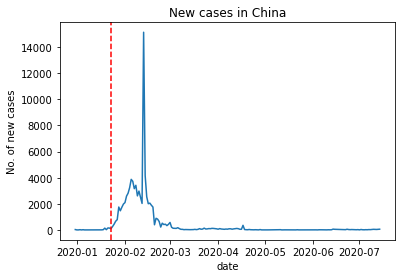

In [293]:
plt.plot(china.date,china.new_cases)
plt.title('New cases in China')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-01-23'), color="red", linestyle="--")
plt.show()

In China as well looking at the overall graph we can conclude that the lockdown worked as China was able to reduce the daily number of cases to almost 0 and from the end of March onwards. China imposed very strict restrictions in cities that were affected by the virus. The  transports in and out of the city were closed, all shops except for food and medicines were shut down, officials proceeded to also do “door to door health checks” and forced people who were ill to self isolate. The drastic rise in the number of cases in mid February is expected to be because of the rigorous testing done to isolate the sick from the healthy.  
https://www.theguardian.com/world/2020/mar/19/chinas-coronavirus-lockdown-strategy-brutal-but-effective

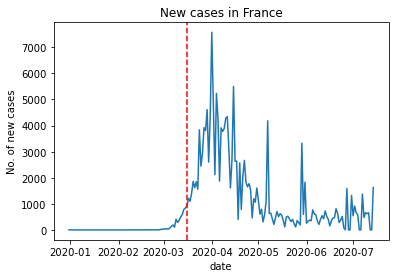

In [294]:
lockdown_france = lockdown_min[lockdown_min.location == 'France']
lockdown_france
france.dtypes
plt.plot(france.date,france.new_cases)
plt.title('New cases in France')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline( pd.Timestamp('2020-03-16'), color="red", linestyle="--")
plt.show()

In France we can see that the lockdown has worked by looking at the overall decreasing trend from April onwards as the number of daily cases decreased approximately to the 1000s from more than 7,000 cases. France imposed 8 weeks of lockdown. Like other countries France also made sure to advocate social distancing, work from home if possible and limited social gatherings. They also introduced fines according to the number of breaches made within a time period.  As citizens are faced with consequences of breaching, this might have encouraged them to be compliant to the lockdown.  
https://www.thelocal.fr/20200324/explained-these-are-frances-new-coronavirus-rules

In [320]:
plt.plot(iran.date,iran.new_cases)
plt.title('New cases in Iran')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-03-15'), color="red", linestyle="--")
plt.show()

NameError: name 'iran' is not defined

In Iran the lockdown period was imposed from March 15th to April 11th. While viewing the trend of the number of cases between that time period, a decreasing trend in the number of cases  can be seen. So, therefore, it can be concluded that the short period of lockdown did affect the trend in the number of new cases. 
https://economictimes.indiatimes.com/news/international/world-news/iran-begins-lifting-restrictions-after-brief-virus-lockdown/articleshow/75096972.cms


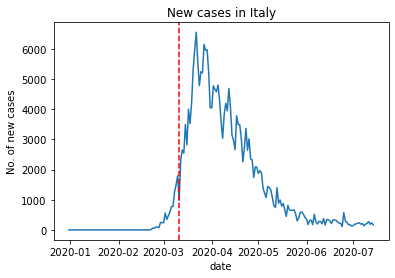

In [297]:
plt.plot(italy.date,italy.new_cases)
plt.title('New cases in Italy')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-03-11'), color="red", linestyle="--")
plt.show()

The lockdown in Italy was imposed from March 11th to May 3rd. While observing the graph between the lockdown dates we can see a gradually decreasing trend, therefore we can conclude that the lockdown did affect the trend in the number of new cases. 
https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_Italy#:~:text=On%2010%20April%2C%20the%20lockdown,would%20start%20from%204%20May.

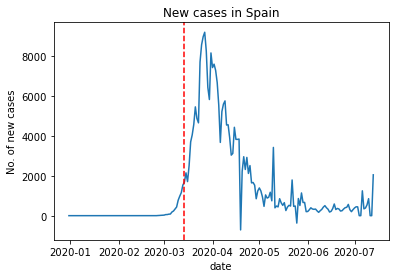

In [319]:
plt.plot(spain.date,spain.new_cases)
plt.title('New cases in Spain')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-03-14'), color="red", linestyle="--")
plt.show()

In Spain the lockdown ended in June as it lasted 3 months and people were only allowed out for essentials reasons. During the time period of the lockdown, we can decipher that the  curve gradually decreased and by the end of the lockdown the number of cases decreased from more than 6000 to less than 1000 daily cases. Therefore, we can conclude that in Spain the lockdown did affect the trend of the new cases curve. 
https://en.as.com/en/2020/04/09/other_sports/1586460059_015568.html

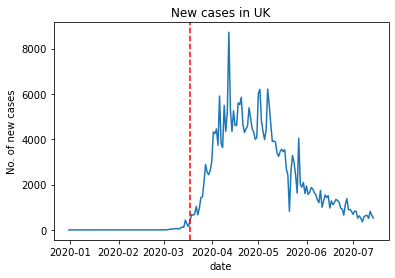

In [274]:
lockdown_uk = lockdown_min[lockdown_min.location == 'United Kingdom']
#lockdown_uk.lockdown_date
plt.plot(uk.date,uk.new_cases)
plt.title('New cases in UK')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-03-18'), color="red", linestyle="--")
plt.show()

The UK started to ease it’s restrictions in July.  Now it has moved from the state of “national lockdown” to a more “targeted lockdown”. Initially the UK imposed two meters “social distancing measures” and banned indoor gatherings and only allowed people to be out for essentials. Viewing the lockdown time period we definitely can see a change in the trend. The cases gradually decreased from the peak to approximately less than 1000s cases. Therefore we can say that the lockdown did affect the trend. 
https://www.wired.co.uk/article/uk-lockdown

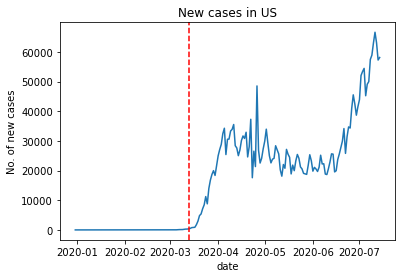

In [279]:
plt.plot(us.date,us.new_cases)
plt.title('New cases in US')
plt.xlabel('date')
plt.ylabel('No. of new cases')
plt.axvline(pd.Timestamp('2020-03-13'), color="red", linestyle="--")
plt.show()

By viewing the trend in the US we can see that although lockdown is implemented the US hasn't been able to flatten the curve. The cases have still been increasing. Health officials stated that when the lockdown began in the US the virus was already "spreading far and wide".  In the US the people have shown continuous resistance to the lockdowns, even the president supported the anti-lockdown protests happening in few of the states as the lockdown hampered the economy since according to the statistics more than 108 million Americans cannot work from home. As the cases increase it makes it even more challenging to isolate the infected and conduct contract tracing. Therefore, in this case the lockdown didn't seem to be effective. 
https://texasscorecard.com/federal/new-data-suggests-coronavirus-lockdowns-didnt-work/


Therefore, lockdowns in most countries did reduce the number of cases. While,In the US the actions taken to mitigate the virus were taken late and due to strong emphasis in protecting individual rights and interests people have not been complying to the restrictions being applied. Therefore, It is evident that the lockdown to work requires strong leadership and coordination for the public as well. 


### Question 3.  
Explore whether there is a relation between daily new case/death rate and the GDP of a country. To this aim, you need to calculate: 
*	The average of GDP of the countries, and then divide the countries into two groups, a group which its GDP is above the average GDP, and another group which its GDP is below the average GDP. We call the former group as "AboveGDP" and the later as "BelowGDP" from now onwards.
*	The daily new cases rate (new cases divided by population) for each country
*	The daily new death rate (new deaths divided by population) for each country 
        
Then, you need to create two line charts, one which shows the new case rate of groups "AboveGDP" and "BelowGDP"; and, another line chart to show the death rate of the two groups ("AboveGDP" and "BelowGDP").

    a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?
    b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?
    c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Does 
    the result of your visualisation is the same as the mentioned expectation? If no, why do you think the expectation is 
    different from the reality? 


In [281]:
countries_gdp=clean_data.groupby('location').agg({'gdp_per_capita':'unique'})
countries_gdp

# #flattening the groupby output
countries_gdp = countries_gdp.reset_index()                  # turn 'class' groups into column values
countries_gdp.gdp_per_capita= countries_gdp.gdp_per_capita.astype('float')
countries_gdp

,location,gdp_per_capita
0,Australia,44648.710
1,China,15308.712
2,France,38605.671
3,Iran,19082.620
4,Italy,35220.084
5,Spain,34272.360
6,United Kingdom,39753.244
7,United States,54225.446


In [282]:
gdp_mean=countries_gdp.gdp_per_capita.mean()
gdp_mean

35139.605875

In [283]:
#countries above avg GDP
countries_gdp[countries_gdp.gdp_per_capita> gdp_mean]

,location,gdp_per_capita
0,Australia,44648.710
2,France,38605.671
4,Italy,35220.084
6,United Kingdom,39753.244
7,United States,54225.446


In [284]:
AboveGDP = pd.DataFrame(clean_data[(clean_data.location =='Australia')|(clean_data.location =='France')|(clean_data.location =='Italy')|
                      (clean_data.location =='United Kingdom') | (clean_data.location =='United States')])
AboveGDP.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881,2020-03-24
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881,2020-03-24
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881,2020-03-24
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881,2020-03-24
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881,2020-03-24


In [285]:
#Countries below avg GDP 
countries_gdp[countries_gdp.gdp_per_capita< gdp_mean]

,location,gdp_per_capita
1,China,15308.712
3,Iran,19082.620
5,Spain,34272.360


In [288]:
#creating a dataset of countires with lowGDP than average 
BelowGDP = pd.DataFrame(clean_data[(clean_data.location =='China')|(clean_data.location =='Iran')|
                                   (clean_data.location =='Spain')])

BelowGDP.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
197,China,2019-12-31,27,27,0,0,15308.712,1439323774,2020-01-23
198,China,2020-01-01,27,0,0,0,15308.712,1439323774,2020-01-23
199,China,2020-01-02,27,0,0,0,15308.712,1439323774,2020-01-23
200,China,2020-01-03,44,17,0,0,15308.712,1439323774,2020-01-23
201,China,2020-01-04,44,0,0,0,15308.712,1439323774,2020-01-23


In [289]:
#adding columns to the data set
AboveGDP['new_cases_rate']=  np.nan
AboveGDP['new_deaths_rate']=  np.nan

AboveGDP
for i, row in AboveGDP.iterrows():
    AboveGDP.loc[i,'new_cases_rate']= AboveGDP.loc[i].new_cases /AboveGDP.loc[i].population
    AboveGDP.loc[i,'new_deaths_rate']= AboveGDP.loc[i].new_deaths /AboveGDP.loc[i].population
#https://www.geeksforgeeks.org/how-to-add-empty-column-to-dataframe-in-pandas/?ref=rp

In [291]:
AboveGDP.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date,new_cases_rate,new_deaths_rate
1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647,2020-03-13,0.000190,0.000003
1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647,2020-03-13,0.000201,0.000002
1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647,2020-03-13,0.000190,0.000002
1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647,2020-03-13,0.000173,0.000001
1574,United States,2020-07-14,3363056,58114,135605,400,54225.446,331002647,2020-03-13,0.000176,0.000001


In [292]:
#adding columns to the dataset
BelowGDP['new_cases_rate']=  np.nan
BelowGDP['new_deaths_rate']=  np.nan

BelowGDP
for i, row in BelowGDP.iterrows():
    BelowGDP.loc[i,'new_cases_rate']= BelowGDP.loc[i].new_cases /BelowGDP.loc[i].population
    BelowGDP.loc[i,'new_deaths_rate']= BelowGDP.loc[i].new_deaths /BelowGDP.loc[i].population

In [293]:
BelowGDP.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date,new_cases_rate,new_deaths_rate
197,China,2019-12-31,27,27,0,0,15308.712,1439323774,2020-01-23,1.875881e-08,0.0
198,China,2020-01-01,27,0,0,0,15308.712,1439323774,2020-01-23,0.000000e+00,0.0
199,China,2020-01-02,27,0,0,0,15308.712,1439323774,2020-01-23,0.000000e+00,0.0
200,China,2020-01-03,44,17,0,0,15308.712,1439323774,2020-01-23,1.181110e-08,0.0
201,China,2020-01-04,44,0,0,0,15308.712,1439323774,2020-01-23,0.000000e+00,0.0


In [303]:
#getting the average rate of new cases rate and new_deaths rate for a particular day for Above avg GDP countries
AboveGDP_rate=pd.DataFrame(AboveGDP.groupby('date').agg({'new_cases_rate':'mean','new_deaths_rate':'mean'}))
AboveGDP_rate

# # #flattening the groupby output
AboveGDP_rate = AboveGDP_rate.reset_index()    # turn 'class' groups into column 
AboveGDP_rate.head()

,date,new_cases_rate,new_deaths_rate
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0


In [306]:
#getting the average rate of new cases rate and new_deaths rate for a particular day for Below avg GDP countries
BelowGDP_rate=pd.DataFrame(BelowGDP.groupby('date').agg({'new_cases_rate':'mean','new_deaths_rate':'mean'}))
BelowGDP_rate

#flattening the groupby output
BelowGDP_rate = BelowGDP_rate.reset_index()    # turn 'class' groups into column 
BelowGDP_rate.head()

,date,new_cases_rate,new_deaths_rate
0,2019-12-31,6.252936e-09,0.0
1,2020-01-01,0.000000e+00,0.0
2,2020-01-02,0.000000e+00,0.0
3,2020-01-03,3.937034e-09,0.0
4,2020-01-04,0.000000e+00,0.0


https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

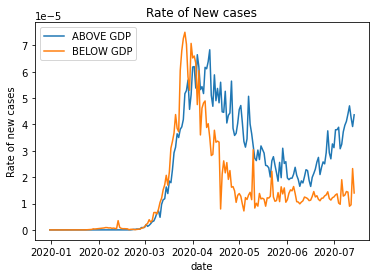

In [317]:
plt.plot(AboveGDP_rate.date,AboveGDP_rate.new_cases_rate,label='ABOVE GDP')
plt.plot(BelowGDP_rate.date,BelowGDP_rate.new_cases_rate, label='BELOW GDP')
plt.legend(loc="upper left")
plt.title('Rate of New Cases')
plt.xlabel('date')
plt.ylabel('Rate of new cases')
plt.show()

a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?

According to the graph we can see that till April(2020-04) Below GDP had a higher rate of new cases. However from then onwards it is seen that Above GDP has highter rate of new cases. Therefore, AboveGDP countries usually had a higher values of case rate.

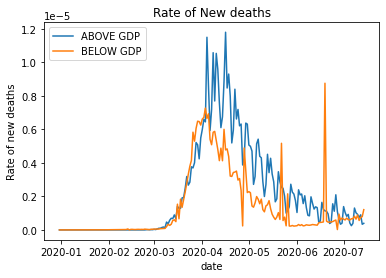

In [318]:
plt.plot(AboveGDP_rate.date,AboveGDP_rate.new_deaths_rate,label='ABOVE GDP')
plt.plot(BelowGDP_rate.date,BelowGDP_rate.new_deaths_rate, label='BELOW GDP')
plt.legend(loc="upper left")
plt.title('Rate of New Deaths')
plt.xlabel('date')
plt.ylabel('Rate of new deaths')
plt.show()


b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?

From the above graph it is evident that the AboveGDP group usually hadhigher values of death rate.  

c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Is the result of your visualisation the same as the mentioned expectation? If no, why do you think the expectation is different from the reality?

The result of my visualisation is different from the mentioned expectation. While it is true that higher GDP countries have enough resources to counter the virus the expectation is different from reality as demographics play a very big role in the no. of new cases and deaths occurring. Covid is seen to be lethal for elderly people. Therefore, countries with higher demography of older people are more likely to experience higher rates of new cases and deaths. People from higher GDP countries have the luxury to make international travels and trades. International travel has been one of the main reasons for the virus to be spreading, therefore countries/cities that have higher travellers coming into the country experienced more cases and deaths. While countries with lower gdp  having lower rates of travellers coming in might have experienced lower rates of cases and thus experienced lower deaths. 

Also, it takes  a community's effort to fight the virus. Countries with higherGDP for instance the US have a more liberal system on the basis of individualism therefore are more focused on individual needs rather than the communities, which can be seen by people resisting lockdown, therefore aids to increased number of cases and deaths.  Also, for countries with higher GDP they might have enough resources to hold mass testing and check if the people have contracted the virus. While countries with lower GDP might not be able to hold enough tests to check if they have the virus or not, therefore the lower rate of new cases. Likewise they might not be able to detect whether a death is due to the virus.  

https://www.abc.net.au/news/2020-05-21/why-do-rich-countries-have-such-high-coronavirus-death-rates/12264610
https://www.globaltimes.cn/content/1186547.shtml